# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
df = pd.read_csv('data/human_body_temperature.csv')

In [52]:
# Your work here
print(df.head())
temperature = df['temperature']
print(len(temperature))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
130


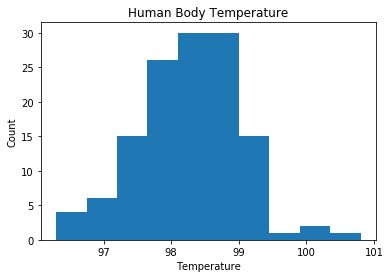

In [53]:
plt.hist(temperature) # plot histogram of the temperature data to see if it remembers a bell curve
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Human Body Temperature')
plt.show() #doesn't look perfectly normally distributed but vaguely resembles a bell curve, further investigation is needed

In [54]:
def ecdf(data): #define EDCF function used in data camp exercises to compare temperature ECDF to ECDF from random normal distribution with same mean and std dev
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

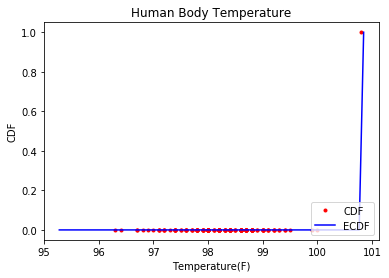

In [55]:
x_temp, y_temp = ecdf(temperature) #

theoretical_temp = np.random.normal(np.mean(temperature), np.std(temperature), 10000)

x_theor, y_theor = ecdf(theoretical_temp)

plt.plot(x_temp, y_temp, marker='.', linestyle='none', color='red')
plt.plot(x_theor,y_theor, color='blue')
plt.xlabel('Temperature(F)')
plt.ylabel('CDF')
plt.title('Human Body Temperature')
plt.legend(('CDF', 'ECDF'), loc='lower right')
plt.show()

In [56]:
The sample size is 130(given to us by taking the length of the series temperature), which is above the 30 required for the 
central limit theorem to apply. We also assume the observations are independent. 

SyntaxError: invalid syntax (<ipython-input-56-c2f231ed73c2>, line 1)

In [ ]:
#Is true population mean 98.6 degrees?

bs_replicates = np.empty(10000)#create andd empty array to be filled w the means of the bootstrapped sample

for i in range(10000): #use for loop to fill out empty array with the mean of boostrapped sample
    bs_sample = np.random.choice(temperature, size = len(temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
p_value = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print(p_value) #p-value is 0, meaning in 10000 samples, the mean of temperature was never as high as 98.6 degrees.

In [57]:
#perform a z test 

z = (np.mean(temperature) - 98.6) / (np.std(temperature) / np.sqrt(len(temperature))) 

p_value = stats.norm.cdf(z) * 2
print('p = p(z >= 5.476) + p(z <= -5.476) =', p_value)

#p-value is incredibly small, suggesting we would reject the null hypothesis that the mean of human temperature is 98.6 

('p = p(z >= 5.476) + p(z <= -5.476) =', 4.3523151658821886e-08)


In [58]:
t = z
print('t =', t)

p_t = stats.t.sf(np.abs(t), len(temperature)-1)*2
print('p = p(t >= 5.476) + p(t <= -5.476) =', p_t)
#p-value is incredibly small again so we again reject the null hypothesis

('t =', -5.475925202078116)
('p = p(t >= 5.476) + p(t <= -5.476) =', 2.1887464624095175e-07)


In [68]:
#draw a sample size of 10 from the data and repeat z and t tests
sample = np.random.choice(temperature,size=10)

z = (np.mean(sample) - 98.6) / (np.std(sample) / np.sqrt(10))
p_value2 = stats.norm.cdf(z)
print('p = ', p_value2)

t=z
p_value3 = stats.t.sf(np.abs(t), 9) * 2
print('p = ', p_value3)
#the p-values are much different and would lead you to very different conclusions depending on which one you used. In this instance, with a sample size of 10, we should duse the t-statistic.

('p = ', 0.13196032977844674)
('p = ', 0.2928554997029621)


In [72]:
#what temperature should be considered abnormal?start with boostrap approach depends on the metric you use
#calculate 95% confidence interval of the full sample mean of temperature and also of bootstrapped replicates 

confidence_interval = np.percentile(temperature, [2.5,97.5])
print(confidence_interval)

bs_replicates = np.empty(100000)

for i in range(100000):
    bs_sample = np.random.choice(temperature, size = len(temperature))
    bs_replicates[i] = np.mean(bs_sample)
    
bootstrapped_confidence_interval = np.percentile(bs_replicates,[2.5,97.5])
print(bootstrapped_confidence_interval)

#Depending on how we define abnormal, a human's temperature could be considered abnormal if it were to fall out of the range of 
#either of these 2 confidence intervals. Obviously, the first interval makes more sense to use here in my opinion.

[96.7225 99.4775]
[98.12384615 98.37461538]


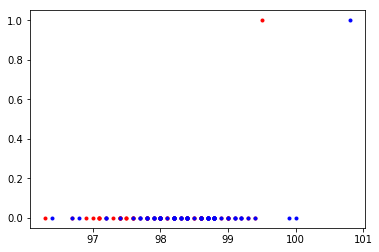

In [75]:
#Is there a significant difference in temperatures between male and female?
male_temperature = df[df['gender'] == 'M']['temperature']
female_temperature = df[df['gender'] == 'F']['temperature']

x_male, y_male = ecdf(male_temperature)
x_female, y_female = ecdf(female_temperature)
plt.plot(x_male,y_male,marker='.', linestyle = 'none', color='red')
plt.plot(x_female,y_female, marker='.', linestyle = 'none', color='blue')
plt.show()


In [76]:
diff_of_means = np.mean(male_temperature) - np.mean(female_temperature) #calculate the difference of means observed in the sample 

permutation_replicates = np.empty(10000) #create an empty array to fill with permutations of the data from the concatenated array

size = len(permutation_replicates)

for i in range(size): 
    combined_permutation_temps = np.random.permutation(np.concatenate([male_temperature,female_temperature]))
    perm_samples_male = combined_permutation_temps[:len(male_temperature)]
    perm_samples_female = combined_permutation_temps[len(male_temperature):]
    permutation_replicates[i] = np.mean(perm_samples_male) - np.mean(perm_samples_female)
    
p_value = np.sum(permutation_replicates >= diff_of_means) / size
print(p_value)

0
